In [20]:
# Referenced Materials:
# Link to dataset: https://github.com/sartajbhuvaji/brain-tumor-classification-dataset
# Brain tumor code ref: https://www.kaggle.com/code/keshavpahwa/dl-final-project-brain-tumor-detection/notebook?scriptVersionId=126563153
# Papers: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9239800/ https://ieeexplore.ieee.org/document/9526262 https://www.mdpi.com/1648-9144/58/8/1090

In [21]:
# Load libraries
import os
import numpy as np
import pandas as pd
import itertools
from time import time
from tqdm import tqdm

import torch
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# checks which device you are using 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
print(device)

cuda


In [204]:
import os
for directory_name, _, filenames in os.walk('/content/drive/MyDrive/brain-tumor-classification-mri/'):
    for filename in filenames:
        print(os.path.join(directory_name, filename))

/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(11).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(10).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(12).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(13).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(100).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(1).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(74).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(75).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(76).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(77).jpg
/content/drive/MyDrive/brain-tumor-classification-mri/Testing/glioma_tumor/image(73).jpg
/content/drive/MyDriv

In [175]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [205]:
import ipywidgets as widgets
import tqdm
import cv2
from PIL import Image
import io
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    path_to_folder = os.path.join('/content/drive/MyDrive/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(path_to_folder):
        img = cv2.imread(os.path.join(path_to_folder,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    path_to_folder = os.path.join('/content/drive/MyDrive/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(path_to_folder):
        img = cv2.imread(os.path.join(path_to_folder,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [187]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [189]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [190]:
# Baseline model params 
num_filters = 32
learning_rate = 0.0001
batch_size = 64

model = Sequential()
model.add(Conv2D(num_filters,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(num_filters*2,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(num_filters*2,(3,3),activation='relu'))
model.add(Conv2D(num_filters*2,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(num_filters*4,(3,3),activation='relu'))
model.add(Conv2D(num_filters*4,(3,3),activation='relu'))
model.add(Conv2D(num_filters*4,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(num_filters*8,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(num_filters*8,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [191]:
# Optimized Model params
num_filters2 = 32
learning_rate2 = 0.001
batch_size2 = 64

model2 = Sequential()
model2.add(Conv2D(num_filters2,(3,3),activation = 'relu',input_shape=(150,150,3)))
model2.add(Conv2D(num_filters2*2,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3))
model2.add(Conv2D(num_filters2*2,(3,3),activation='relu'))
model2.add(Conv2D(num_filters2*2,(3,3),activation='relu'))
model2.add(Dropout(0.3))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3))
model2.add(Conv2D(num_filters2*4,(3,3),activation='relu'))
model2.add(Conv2D(num_filters2*4,(3,3),activation='relu'))
model2.add(Conv2D(num_filters2*4,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3))
model2.add(Conv2D(num_filters2*8,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(num_filters2*8,activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4,activation='softmax'))

In [192]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_208 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 conv2d_209 (Conv2D)         (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_104 (MaxPooli  (None, 73, 73, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_156 (Dropout)       (None, 73, 73, 64)        0         
                                                                 
 conv2d_210 (Conv2D)         (None, 71, 71, 64)        36928     
                                                                 
 conv2d_211 (Conv2D)         (None, 69, 69, 64)        36928     
                                                     

In [193]:
model2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_216 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 conv2d_217 (Conv2D)         (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 73, 73, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_162 (Dropout)       (None, 73, 73, 64)        0         
                                                                 
 conv2d_218 (Conv2D)         (None, 71, 71, 64)        36928     
                                                                 
 conv2d_219 (Conv2D)         (None, 69, 69, 64)        36928     
                                                     

In [166]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) 
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=30, batch_size = batch_size, validation_split=0.1)

Epoch 1/30
42/42 [==============================] - 48s 201ms/step - loss: 3.5446 - accuracy: 0.2823 - val_loss: 1.3783 - val_accuracy: 0.3946
Epoch 2/30
42/42 [==============================] - 8s 194ms/step - loss: 1.3660 - accuracy: 0.3186 - val_loss: 1.3751 - val_accuracy: 0.4626
Epoch 3/30
42/42 [==============================] - 8s 198ms/step - loss: 1.3501 - accuracy: 0.3364 - val_loss: 1.3656 - val_accuracy: 0.4422
Epoch 4/30
42/42 [==============================] - 8s 200ms/step - loss: 1.3245 - accuracy: 0.3632 - val_loss: 1.3474 - val_accuracy: 0.4592
Epoch 5/30
42/42 [==============================] - 8s 199ms/step - loss: 1.2743 - accuracy: 0.3935 - val_loss: 1.3052 - val_accuracy: 0.4932
Epoch 6/30
42/42 [==============================] - 8s 198ms/step - loss: 1.2452 - accuracy: 0.4359 - val_loss: 1.2972 - val_accuracy: 0.5204
Epoch 7/30
42/42 [==============================] - 8s 197ms/step - loss: 1.1832 - accuracy: 0.4741 - val_loss: 1.2368 - val_accuracy: 0.5136
Epoch

In [194]:
optimizer2 = tf.keras.optimizers.Adam(learning_rate=learning_rate2) 
model2.compile(loss='categorical_crossentropy',optimizer=optimizer2,metrics=['accuracy'])
history2 = model2.fit(X_train,y_train,epochs=30, batch_size = batch_size2, validation_split=0.1)

Epoch 1/30
42/42 [==============================] - 12s 188ms/step - loss: 3.0705 - accuracy: 0.2887 - val_loss: 1.3747 - val_accuracy: 0.2789
Epoch 2/30
42/42 [==============================] - 8s 181ms/step - loss: 1.3443 - accuracy: 0.3625 - val_loss: 1.3249 - val_accuracy: 0.4014
Epoch 3/30
42/42 [==============================] - 8s 182ms/step - loss: 1.1834 - accuracy: 0.4684 - val_loss: 1.2204 - val_accuracy: 0.4694
Epoch 4/30
42/42 [==============================] - 8s 183ms/step - loss: 1.0449 - accuracy: 0.5460 - val_loss: 1.0838 - val_accuracy: 0.5408
Epoch 5/30
42/42 [==============================] - 8s 181ms/step - loss: 0.9279 - accuracy: 0.6054 - val_loss: 1.0086 - val_accuracy: 0.5238
Epoch 6/30
42/42 [==============================] - 8s 185ms/step - loss: 0.8487 - accuracy: 0.6390 - val_loss: 0.9519 - val_accuracy: 0.6224
Epoch 7/30
42/42 [==============================] - 8s 185ms/step - loss: 0.7702 - accuracy: 0.6761 - val_loss: 0.8680 - val_accuracy: 0.6701
Epoch

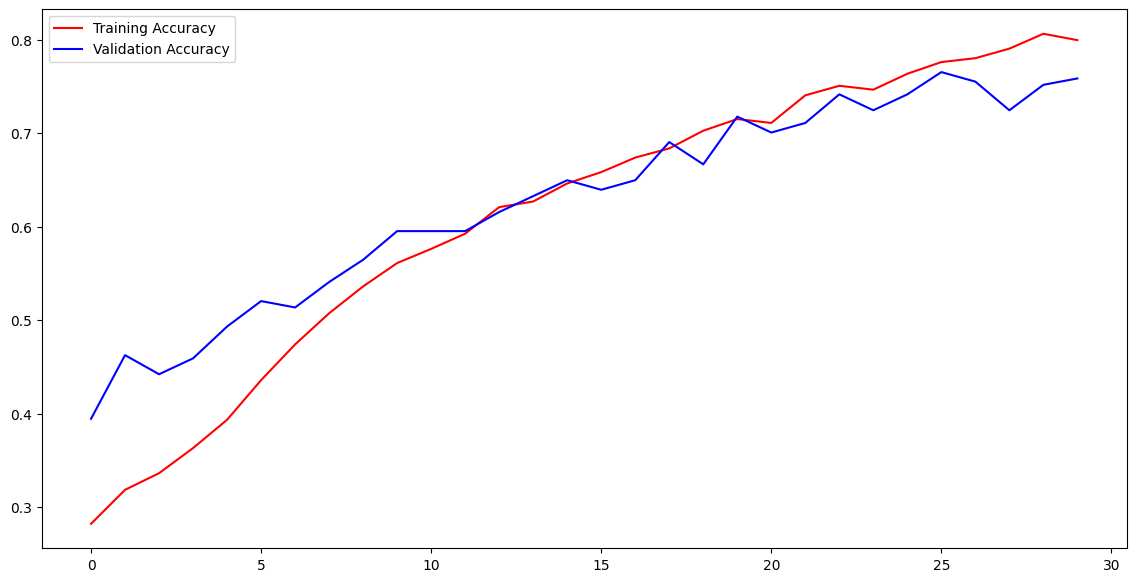

In [198]:
# Baseline Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

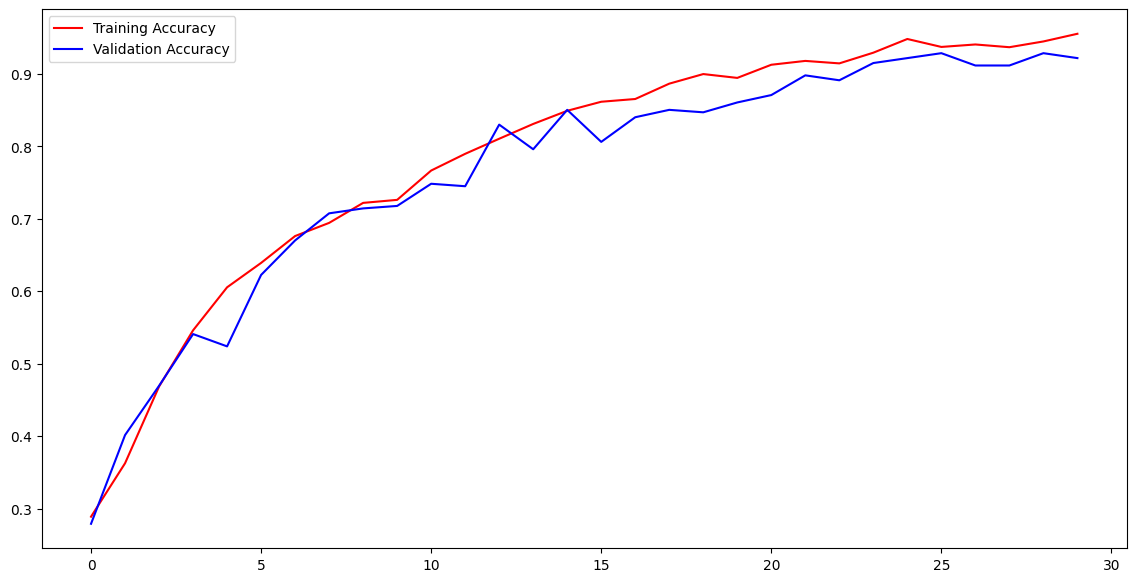

In [195]:
# GA-Optmized Accuracy
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
epochs2 = range(len(acc2))
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs2,acc2,'r',label="Training Accuracy")
plt.plot(epochs2,val_acc2,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

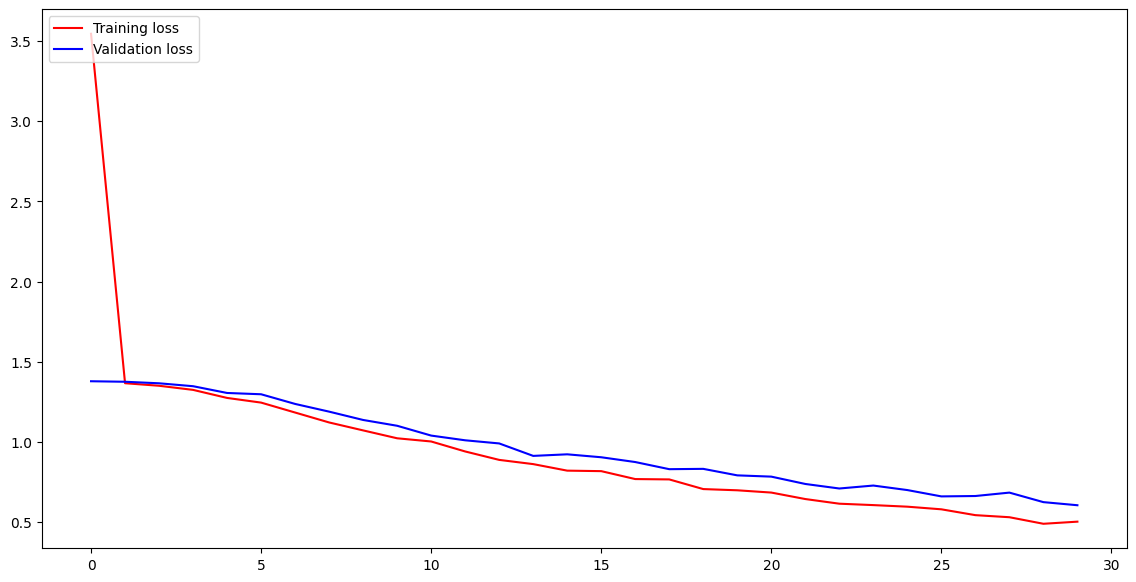

In [168]:
# Baseline Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

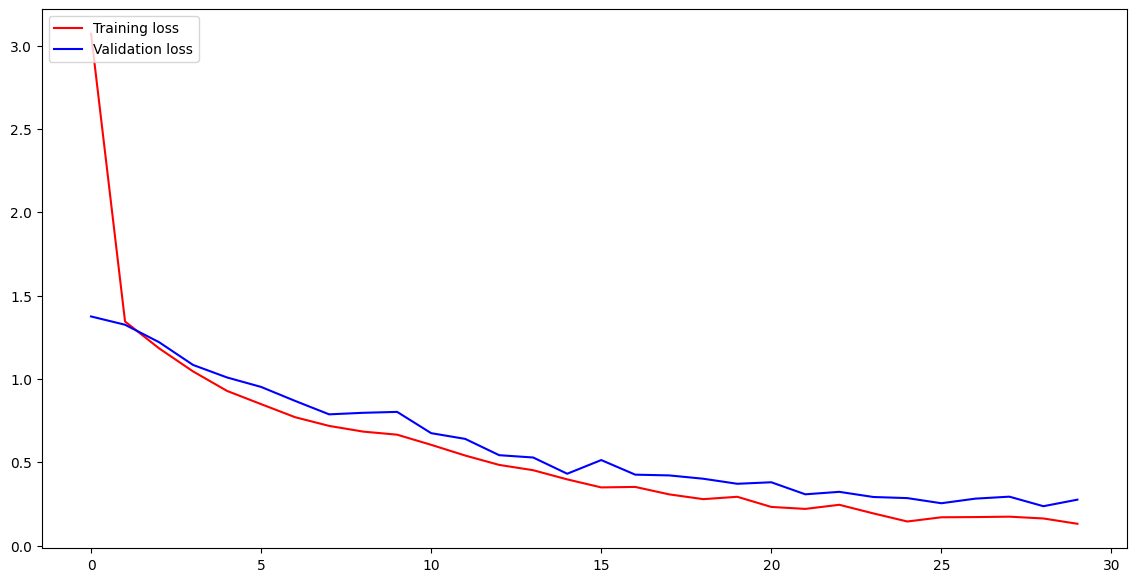

In [196]:
# GA-Optmized Loss
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(len(loss2))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs2,loss2,'r',label="Training loss")
plt.plot(epochs2,val_loss2,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [169]:
img = cv2.imread('/content/drive/MyDrive/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

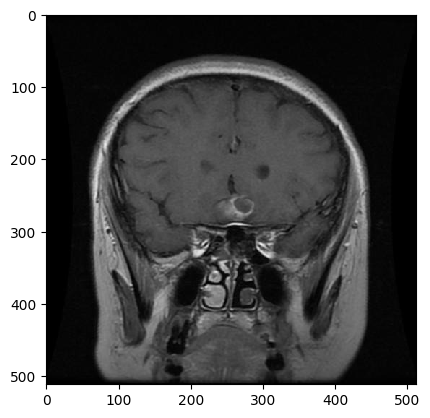

In [170]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

11/11 [==============================] - 0s 25ms/step
[[81  5  1  6]
 [36 47  1 11]
 [ 4  6 39  3]
 [ 2  1  1 83]]


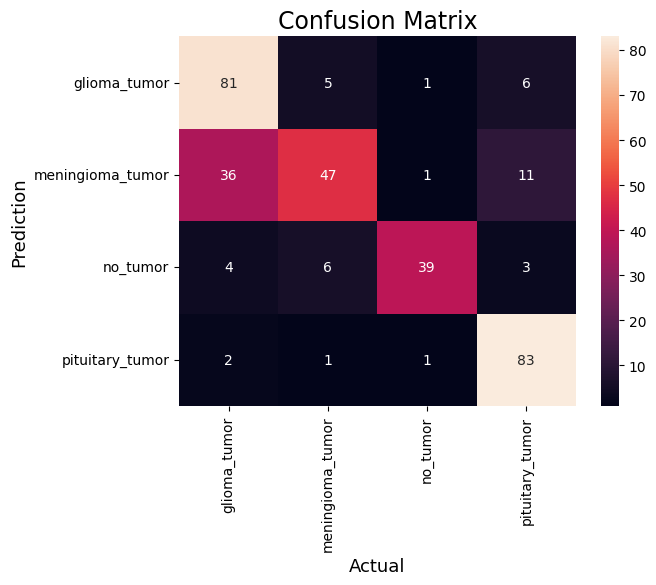

Accuracy   : 0.764525993883792
Precision : 0.7807779172566925
Recall    : 0.764525993883792
F1-score  : 0.755035093189649


In [171]:
# Brain tumor code ref: https://www.kaggle.com/code/keshavpahwa/dl-final-project-brain-tumor-detection/notebook?scriptVersionId=126563153
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'],
            yticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred, )
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision :", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred, average='weighted')
print("F1-score  :", F1_score)

11/11 [==============================] - 1s 27ms/step
[[81  8  0  4]
 [ 3 86  1  5]
 [ 1  1 50  0]
 [ 0  2  1 84]]


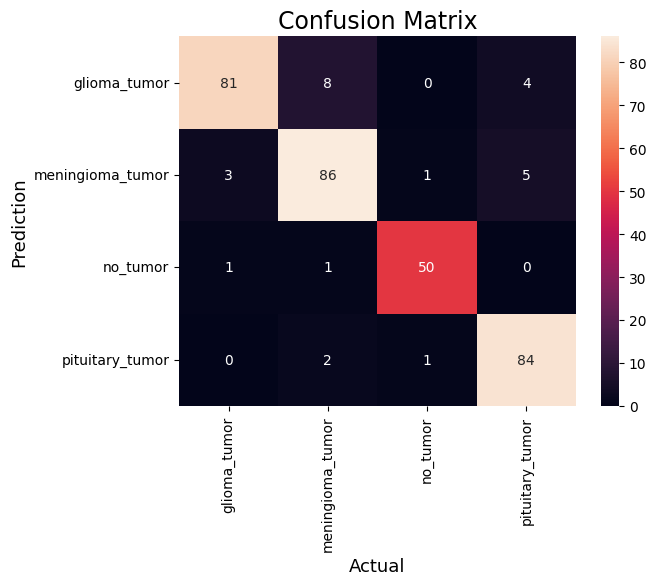

Accuracy   : 0.9204892966360856
Precision : 0.9218072743020378
Recall    : 0.9204892966360856
F1-score  : 0.9203199269262046


In [197]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred2=model2.predict(X_test) 
y_pred2=np.argmax(y_pred2, axis=1)
y_test2=np.argmax(y_test, axis=1)
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)
 
#Plot the confusion matrix.
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'],
            yticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy2 = accuracy_score(y_test2, y_pred2, )
print("Accuracy   :", accuracy2)
precision2 = precision_score(y_test2, y_pred2, average='weighted')
print("Precision :", precision2)
recall2 = recall_score(y_test2, y_pred2, average='weighted')
print("Recall    :", recall2)
F1_score2 = f1_score(y_test2, y_pred2, average='weighted')
print("F1-score  :", F1_score2)

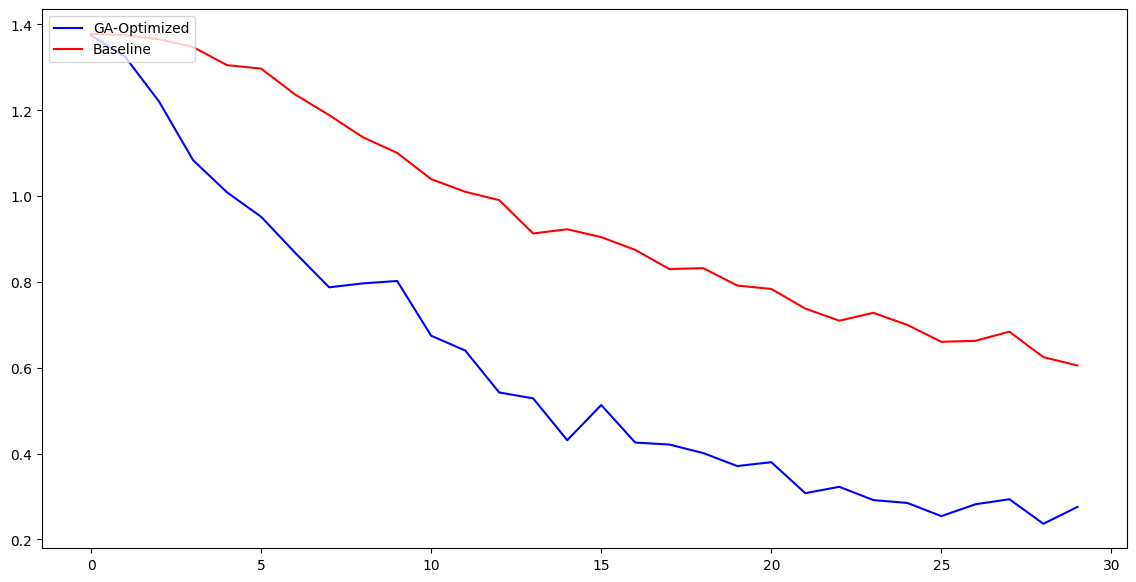

In [199]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs2,val_loss2,'b',label="GA-Optimized")
plt.plot(epochs,val_loss,'r',label="Baseline")
plt.legend(loc='upper left')
plt.show()

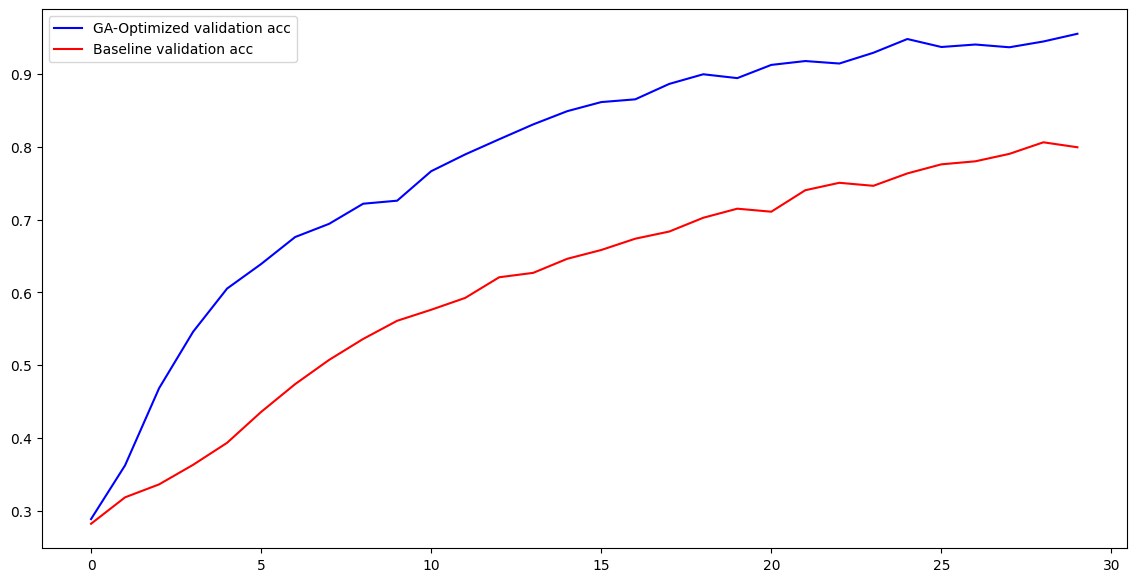

In [203]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs2,acc2,'b',label="GA-Optimized validation acc")
plt.plot(epochs,acc,'r',label="Baseline validation acc ")
plt.legend(loc='upper left')
plt.show()